Here we go trough a bunch of useful examples and algorithms that are important for data analysis and more broadly machine learning.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'viridis'
matplotlib.rcParams.update({'font.size': 18})

In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pylab as plt
from scipy.stats import multivariate_normal as mvn
# initialize K
# import kmeans
from numpy.core.umath_tests import matrix_multiply as mm

# CLUSTER Algorithms

## KMM clusters

Below there are useful function that are used for the KMM cluster algorithm

In [3]:
def plot_res(data, ind, k):
    plt.figure()
    for i in np.arange(k):
        plt.scatter(data[np.where(ind[:, 0] == i)][:, 0],
                    data[np.where(ind[:, 0] == i)][:, 1])

Let's load some toy-data

In [4]:
data = np.loadtxt('toydata.txt')

We can plot them and see how they look like.

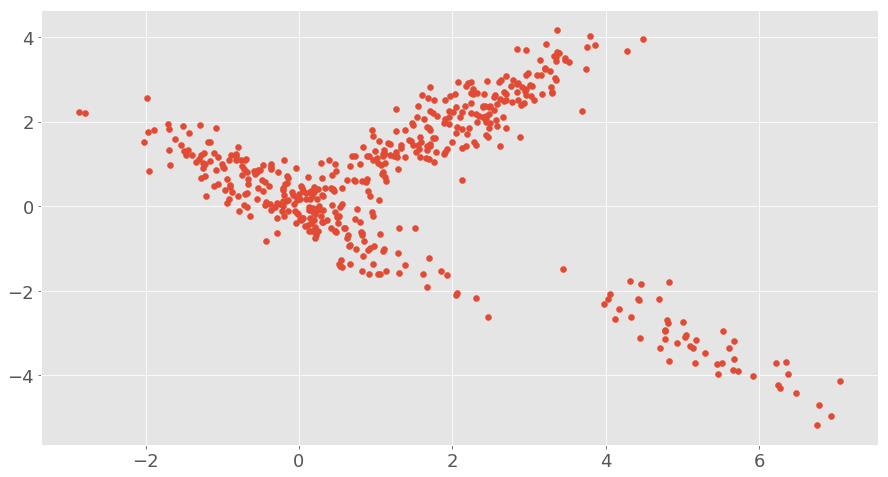

In [6]:
plt.scatter(data[:,0],data[:,1]);

We can see by eye that they show some level of clustering. Now let's see how machines figures this out on their own.

### Initialization 

The first step of a clustering algorithm is to start with some guess for the center of the final clusters.
The easiest things to do is to just choose 2 random points in the sets we have. As we can imagine this is not the optimal way and can lead the algorithm to get stuck in local minimima.

A clever algorithm for clustering is Kmeans++
From WIKI:
In data mining, k-means++[1][2] is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It was proposed in 2007 by David Arthur and Sergei Vassilvitskii, as an approximation algorithm for the NP-hard k-means problem—a way of avoiding the sometimes poor clusterings found by the standard k-means algorithm.



In [53]:
# initialize K
np.random.seed(20)

# How should we initialize clusters? randomly?


def initialize(X, k):
#     np.random.seed(20)
    mu_i = np.random.randint(0, high=np.shape(X)[0], size=k)
    return X[mu_i, :]


# or with a clever algorithm?


def initialize_kpp(X, k):
    mu = np.zeros([k, np.shape(X)[1]])
#     np.random.seed(22)

    mu_i = np.random.randint(0, high=np.shape(X)[0])
    mu[0, :] = X[mu_i, :]
    for i in np.arange(1, k):
        D2 = np.array([min([np.linalg.norm(x - m)**2 for m in mu]) for x in X])
        probs = D2 / D2.sum()
        cumprobs = probs.cumsum()
        ind = np.where(cumprobs >= np.random.rand())[0][0]
        mu[i, :] = X[ind, :]
    return mu

In [22]:
# k is the targeted number of cluster we want to obtain. k=3 seems a reasonable value after an inspection "by eye"
mu = initialize_kpp(data, k=3)
mu1 = initialize(data, k=3)

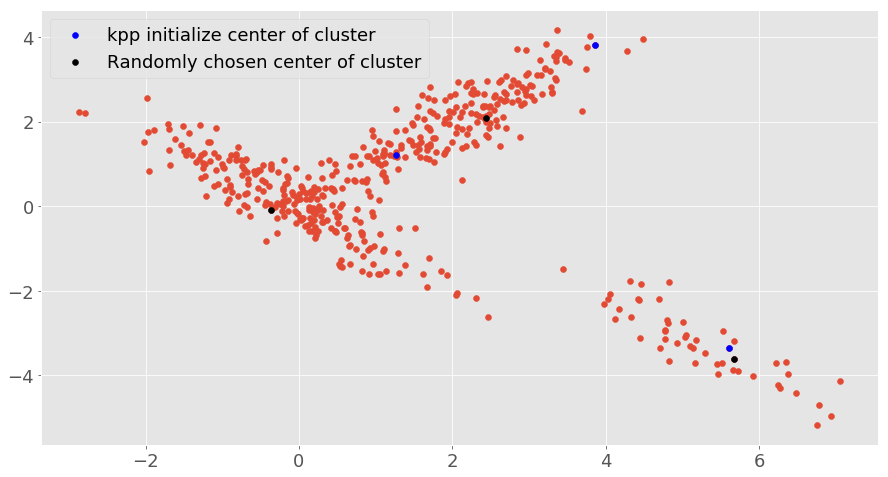

In [26]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(mu[:,0],mu[:,1],label='kpp initialize center of cluster',color = 'blue')
plt.scatter(mu1[:,0],mu1[:,1],label='Randomly chosen center of cluster', color='black')
plt.legend(loc=0);

Here you can see how the Kmeans++ does a better job in ...

### Assign

What is the next step? assign all the points to a cluster. Once we define a concept of "measure" we can just assing a point to the cluster which center is the closest

In [27]:
def assign(X, mu_list):
    distances = np.linalg.norm(X - mu_list[0], axis=1)**2

    for i, mu in enumerate(mu_list[1:]):
        dist = np.linalg.norm(X - mu, axis=1)**2
        distances = np.vstack([distances, dist])
    ind_assignment = np.argmin(distances, axis=0)

    return ind_assignment


def dist_functi(data, indeces, mu, k):
    cost_funct = 0
    for i in range(k):
        distances = np.sum(
            np.linalg.norm(data[np.where(indeces == i)] - mu[i], axis=1)**2)
        cost_funct += distances
    return cost_funct

Let's stick with the Kmeans++ starting centers and assign points

In [28]:
#assign
ind = assign(data, mu)

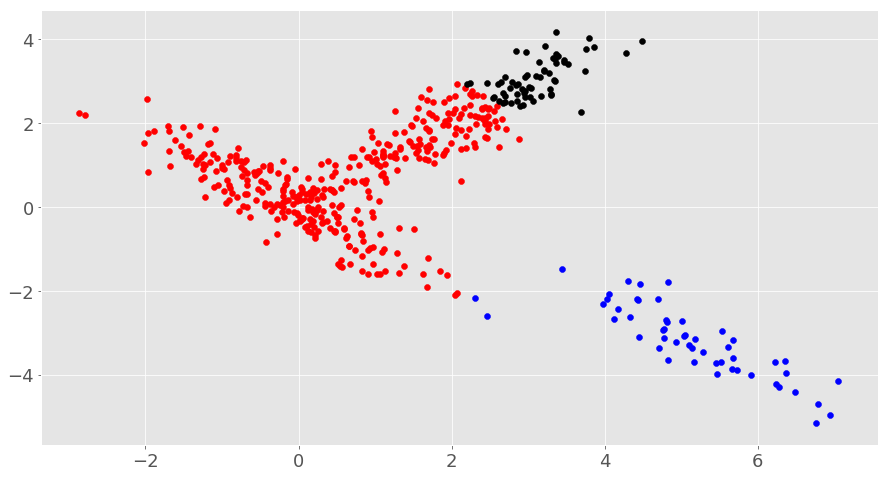

In [29]:
plt.scatter(data[np.where(ind==0),0],data[np.where(ind==0),1],color = 'red')
plt.scatter(data[np.where(ind==1),0],data[np.where(ind==1),1],color = 'blue')
plt.scatter(data[np.where(ind==2),0],data[np.where(ind==2),1],color = 'k')

### Recompute center

Then what? then since we have clusters right now we want their center to be at the true center i.e at the middle point the one that minimize the distance between the points in the cluster and the center.
We want the cluster to be "compact" with all the points as close as possible to the center (when the only freedom we have is to assign the center not moving points!)

In [30]:
def compute_new_mu(data, indeces, K):
    mu = np.zeros([K, np.shape(data)[1]])
    for i in np.arange(K):
        mu[i] = np.mean(data[np.where(indeces == i)], axis=0)
    return mu

In [31]:
new_mu = compute_new_mu(data, ind,3)

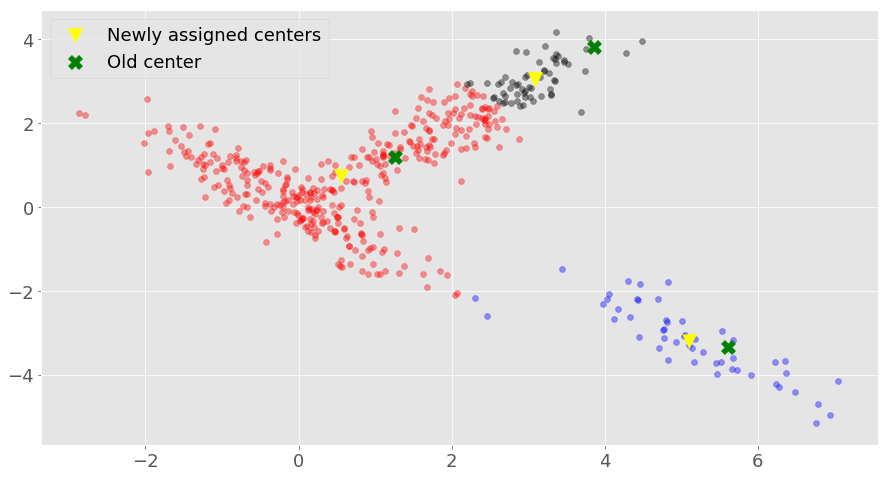

In [44]:
plt.scatter(
    data[np.where(ind == 0), 0],
    data[np.where(ind == 0), 1],
    color='red',
    alpha=0.4)
plt.scatter(
    data[np.where(ind == 1), 0],
    data[np.where(ind == 1), 1],
    color='blue',
    alpha=0.4)
plt.scatter(
    data[np.where(ind == 2), 0],
    data[np.where(ind == 2), 1],
    color='k',
    alpha=0.4)
plt.scatter(
    new_mu[:, 0],
    new_mu[:, 1],
    marker='v',
    label='Newly assigned centers',
    color='yellow',
    s=200)
plt.scatter(
    mu[:, 0], mu[:, 1], marker='X', label='Old center', color='green', s=200)
plt.legend(loc=0)

for example here...

### Iterate!! 

Now we can just iterate the algorithm n_times as long as the center of the clusters are the same after iteration. At that point the algorithm as converged!!

In [45]:
data = np.loadtxt('toydata.txt')
k = 3
mu = initialize_kpp(data, k)
flag = 0
cost = []
while flag == 0:
    ind = assign(data, mu)
    cost.append(dist_functi(data, ind, mu, k))
    new_mu = compute_new_mu(data, ind, k)
    if np.array_equal(new_mu, mu):
        flag = 1
    mu = new_mu

print('n interations', len(cost))

n interations 7


Now we can look at the clusters we found

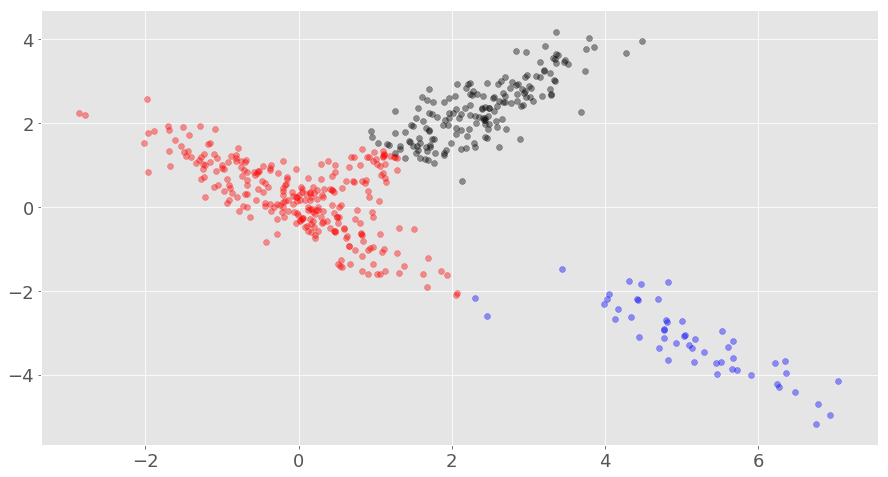

In [47]:
plt.scatter(data[np.where(ind==0),0],data[np.where(ind==0),1],color = 'red',alpha=0.4)
plt.scatter(data[np.where(ind==1),0],data[np.where(ind==1),1],color = 'blue',alpha=0.4)
plt.scatter(data[np.where(ind==2),0],data[np.where(ind==2),1],color = 'k',alpha=0.4)

With random initialization sometimes it does not converge
Do a plot of a live search

They look reasonable

### Initial conditions and convergence to local minima

In [54]:
def run_kmeans(datafile='toydata.txt', init='k++', k=3, iterate=20):

    data = np.loadtxt(datafile)
    k = 3
    cost = []

    ind_output = np.zeros([np.shape(data)[0], iterate])

    for i in np.arange(iterate):

        if init == 'k++':
            mu = initialize_kpp(data, k)
        else:
            mu = initialize(data, k)

        flag = 0
        cost_internal = []
        while flag == 0:
            ind = assign(data, mu)
            cost_internal.append(dist_functi(data, ind, mu, k))
            new_mu = compute_new_mu(data, ind, k)
            if np.array_equal(new_mu, mu):
                flag = 1
            mu = new_mu
        ind_output[:, i] = ind
        cost.append([cost_internal])
    return cost, ind_output


def run_kmeans_bench(data, init='k++', k=3, iterate=20):

    k = 3

    ind_output = np.zeros([np.shape(data)[0], iterate])
    for i in np.arange(iterate):

        if init == 'k++':
            mu = initialize_kpp(data, k)
        else:
            mu = initialize(data, k)
        flag = 0
        while flag == 0:
            ind = assign(data, mu)
            new_mu = compute_new_mu(data, ind, k)
            if np.array_equal(new_mu, mu):
                flag = 1
            mu = new_mu
        ind_output[:, i] = ind
    return ind_output

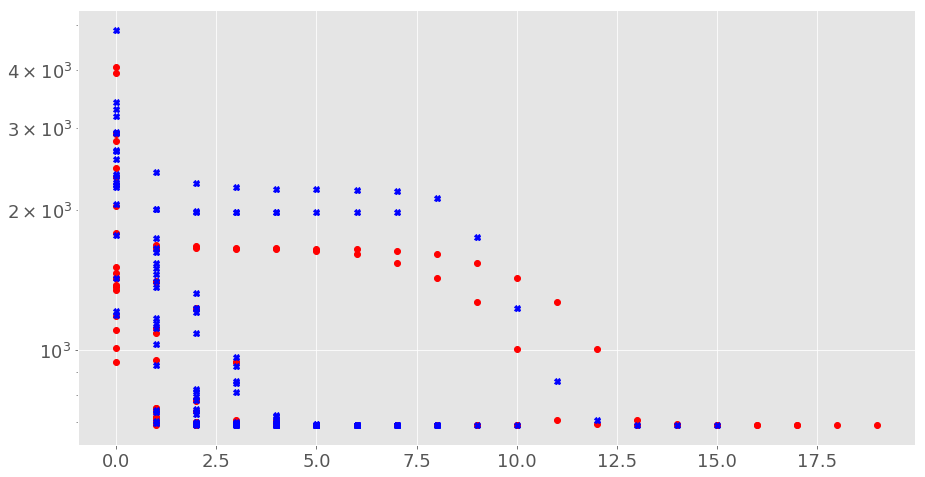

In [64]:
cost, out = run_kmeans(init='k++', k=3, iterate=20)
[plt.semilogy(cost[i][0], 'ro') for i in np.arange(0, len(cost))];
cost, out = run_kmeans(init='random', k=3, iterate=20)
[plt.semilogy(cost[i][0], 'bX') for i in np.arange(0, len(cost))];

## Gaussian Mixtures

In [ ]:
def initialize_GM(X, k):
    pi = np.random.rand(k)
    pi /= np.sum(pi)
    mu = initialize_kpp(X, k)
    sigmas = np.array([np.eye(2)] * k)
    return pi, mu, sigmas


In [88]:
 pi, mu, sigmas = initialize_GM(data,k=3)

In [96]:

def plot_models(xs, pis1, mus1, sigmas1):
    intervals = 101
    ys = np.linspace(-8, 8, intervals)
    X, Y = np.meshgrid(ys, ys)
    _ys = np.vstack([X.ravel(), Y.ravel()]).T
    ind = np.zeros([np.shape(xs)[0], 3])
    z = np.zeros(len(_ys))
    for i, (pi, mu, sigma) in enumerate(zip(pis1, mus1, sigmas1)):
        z += pi * mvn(mu, sigma).pdf(_ys)
        ind[:, i] = pi * mvn(mu, sigma).pdf(xs)

    indeces = np.argmax(ind, axis=1)
    z = z.reshape((intervals, intervals))

    # find indeces to make plot

    ax = plt.subplot(111)
    plt.scatter(mus1[:, 0], mus1[:, 1], alpha=1., c='r', marker='d', s=80)

    plt.scatter(xs[np.where(indeces == 0), 0], xs[np.where(indeces == 0), 1], alpha=0.3, c='b')
    plt.scatter(xs[np.where(indeces == 1), 0], xs[np.where(indeces == 1), 1], alpha=0.3, c='r')
    plt.scatter(xs[np.where(indeces == 2), 0], xs[np.where(indeces == 2), 1], alpha=0.3, c='k')

    plt.contour(X, Y, z, 9)
    plt.axis([-6, 8, -6, 6])
    ax.axes.set_aspect('equal')
    plt.tight_layout()
    return 0


0

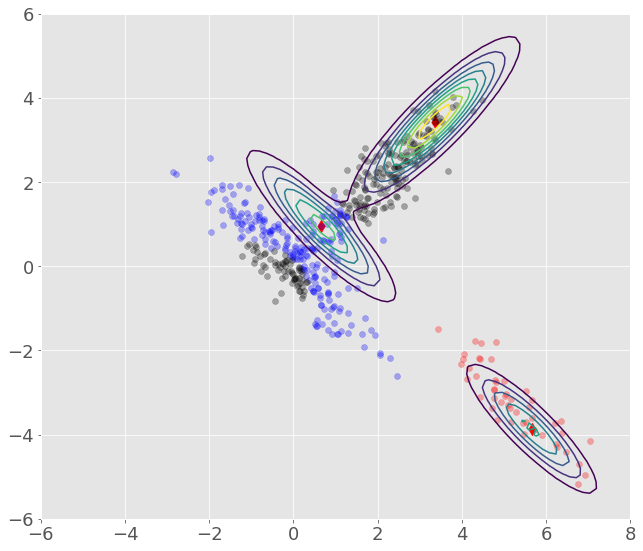

In [97]:
plot_models(data, pi, mu, sigmas)

In [98]:
def MLE_gaussian_mix(data, weights, means, sigmas, tol=0.01, max_iter=100):

    n, p = data.shape
    k = len(weights)

    ll_old = 0
    for i in range(max_iter):

        like_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = weights[j] * mvn(means[j], sigmas[j]).pdf(data)
        ws /= ws.sum(0)

        # M-step
        weights = ws.sum(axis=1)
        weights /= n

        means = np.dot(ws, data)
        # vectorize this in python is damn hard you can do the trick with transpose
        # means /= ws.sum(1)[:, None]
        means = (means.T / ws.sum(1)).T

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = data - means[j, :]
            sigmas[j] = (ws[j, :, None, None] * mm(ys[:, :, None], ys[:, None, :])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:, None, None]

        # compute the  likelihoood anc compare
        like_new = 0
        for pi, mu, sigma in zip(weights, means, sigmas):
            like_new += pi * mvn(mu, sigma).pdf(data)
        like_new = np.log(like_new).sum()

        if np.abs(like_new - ll_old) < tol:
            break
        ll_old = like_new

    return like_new, weights, means, sigmas

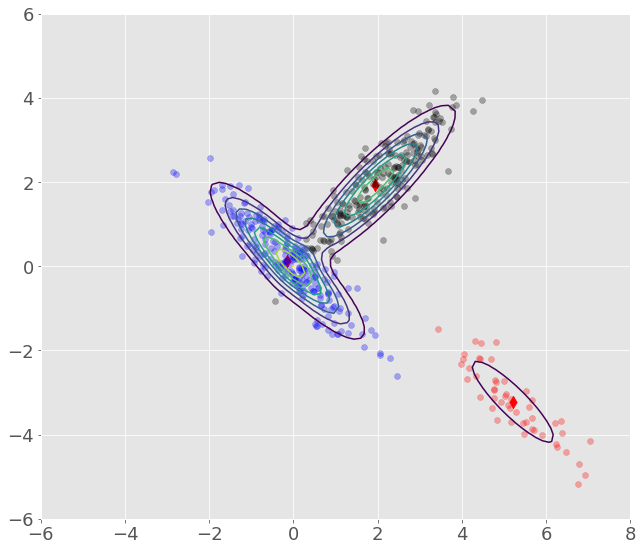

In [99]:
like_new, weights, means, sigmas = MLE_gaussian_mix(data, pi, mu, sigmas)
plot_models(data, weights, means ,sigmas);

---


# Dimensionality reduction

In [201]:
data = np.loadtxt('3Ddata.txt')

In [143]:
def plot_3d(x, ind):
    from mpl_toolkits.mplot3d import Axes3D
    colors = {1: 'g', 2: 'y', 3: 'b', 4: 'r'}

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in np.unique(ind):
        ax.scatter(x[np.where(ind == i)][:, 0], x[np.where(ind == i)][:, 1],
                   x[np.where(ind == i)][:, 2], c=colors[i], alpha=0.8)
    return 0

0

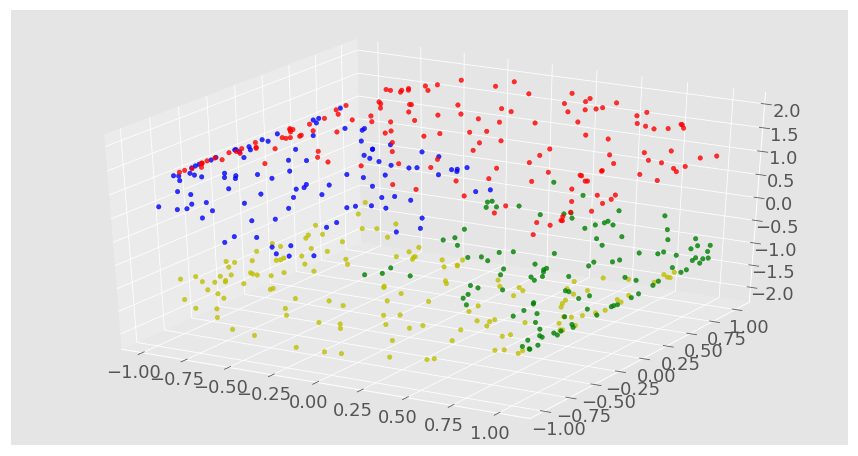

In [144]:
plot_3d(data[:,0:3], data[:,3])

This is a list of 500 objects that live in 4D, indeed they are characterized by 4 numbers also known as features. Of course, it is impossible to visualize the 4D object.
To better visualize your data while retaining the maximum of the information contained in them we can use dimensionality reduction algorithm.

## PCA

In [141]:


# pca starts here.

def pca(x,low_dim=2):
    # center
    x -= np.mean(x, axis=0)
    # compute conv
    sigma = np.dot(x.T, x) / x.shape[0]
    # eigenproblem
    values, vectors = np.linalg.eigh(sigma)
    # sort them
    idx = values.argsort()[::-1]
    # eigenValues = values[idx]
    eigenVectors = vectors[:, idx]

    # project into eigenvector and return
    return np.dot(x, eigenVectors[:, :low_dim])


In [161]:
x = data[:, 0:3]
res = pca(x,2);

In [162]:
def plot_2d(x, ind):
    colors = {1: 'g', 2: 'y', 3: 'b', 4: 'r'}
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in np.unique(ind):
        ax.scatter(x[np.where(ind == i)][:, 0], x[np.where(ind == i)][:, 1], c=colors[i], alpha=0.8)
    return 0

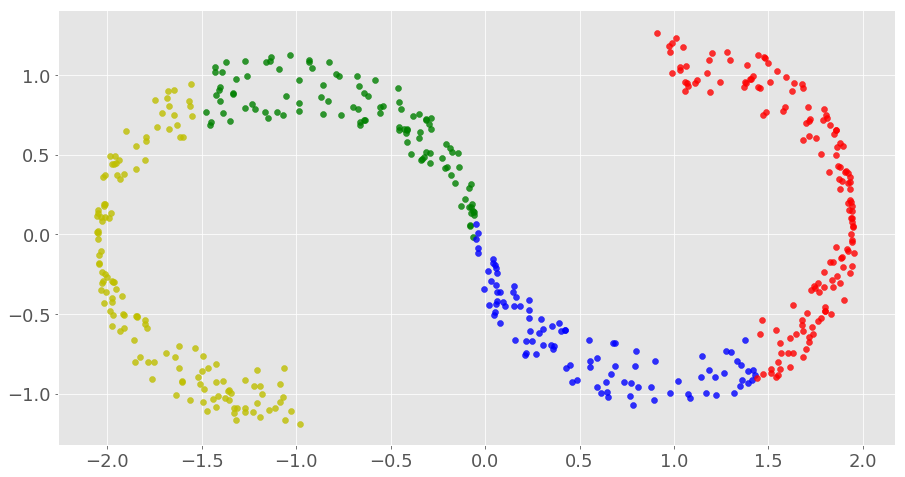

In [163]:
plot_2d(res,data[:,3]);

In [158]:
res = pca(x,1);

In [159]:
def plot_1d(x, ind):
    colors = {1: 'g', 2: 'y', 3: 'b', 4: 'r'}
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in np.unique(ind):
        ax.plot(x[np.where(ind == i)][:, 0], np.zeros_like(
            x[np.where(ind == i)][:, 0]) + i, c=colors[i], alpha=0.8, marker='x')
    return 0

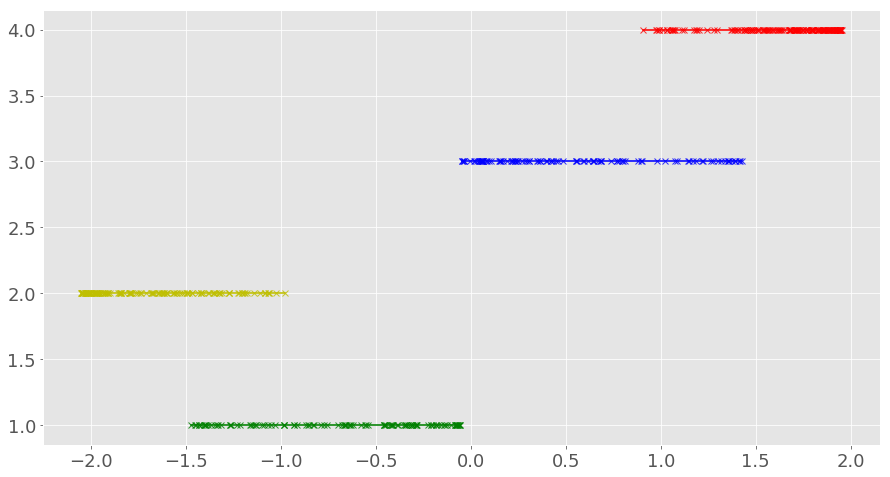

In [160]:
plot_1d(res,data[:,3]);

## ISOMAP

In [202]:
data = np.loadtxt('3Ddata.txt')

In [203]:
def distance_matrix(data):
    '''
    tested
    '''
    distances = np.zeros([data.shape[0], data.shape[0]])
    for (i, pointi) in enumerate(data):
        for (j, pointj) in enumerate(data):
            distances[i, j] = np.linalg.norm(pointi - pointj)
    return distances


def set_K_neighboorg(distances, k=10):
    '''
    tested
    '''
    output = np.ones_like(distances)
    # set not connected to inf
    output *= np.inf
    np.fill_diagonal(output, 0)

    for i in range(distances.shape[0]):
        closest = distances[:, i].argsort()[0:k]
        # print i, closest
        output[i, closest] = distances[i, closest]
        # output[closest, i] = distances[closest, i]
    return output


# apply Floyd algotrithm

def shortest_path(distances):
    output = distances.copy()
    # for i in range(output.shape[0]):
    #     output = np.minimum(output, np.add.outer(output[:, i], output[i, :]))

    # for k in range(output.shape[0]):
    #     for j in range(output.shape[0]):
    #         for j in range(output.shape[0]):
    #             output[i,j] = min(output[i,j], output[i,k] + output[k,j])
    for k in range(output.shape[0]):
        output = np.minimum(output, output[np.newaxis, k, :] + output[:, k, np.newaxis])

    # for k in xrange(output.shape[0]):
    #     for i in xrange(output.shape[0]):
    #         output[i,:] = minimum(output[i,:], output[i,k] + output[k,:])

    return output


# Below all give the same mds tested for debugging



# ========= I TRIED DIFFERENT MDS CAUSE IT DID NOT SEEM TO WORK AT FIRST
# do MDS on this
def mds_run(d, dimensions=2):
    '''
    not fully tested yet
    '''
    # create G_tilde from dist

    (n, n) = d.shape
    # create G_tilde − 1/2 P*D*P
    E = (-0.5 * d**2)

    # Use mat to get column and row means to act as column and row means.
    Er = np.mat(np.mean(E, 1))
    Es = np.mat(np.mean(E, 0))

    F = np.array(E - np.transpose(Er) - Es + np.mean(E))

    [U, S, V] = np.linalg.svd(F)

    # create data given the gram matrix using preposition 2

    Y = U * np.sqrt(S)

    return (Y[:, 0:dimensions], S)


# do MDS on this
def mds_run_2(data, dimensions=2):

    # create G_tilde from data

    data -= np.mean(data, axis=0)
    F = np.dot(data, data.T)
    [U, S, V] = np.linalg.svd(F)

    # create data given the gram matrix using preposition 2

    Y = U * np.sqrt(S)

    return (Y[:, 0:dimensions], S)


def cmdscale(D):

    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n

    # YY^T
    B = -H.dot(D**2).dot(H) / 2

    # Diagonalize
    evals, evecs = np.linalg.eigh(B)

    # Sort by eigenvalue in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    # Compute the coordinates using positive-eigenvalued components only
    w, = np.where(evals > 0)
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:, w]
    Y = V.dot(L)

    return Y, evals


def isomap(data, dim=2, k=10):
    # compute l2 distances among points
    dist = distance_matrix(data)
    # convert into a graph with k-neighbourhs
    #  deltaij = -inf if not connected
    dist_k = set_K_neighboorg(dist, k=k)
    # compute shortest path on the graph
    geodesic_distance = shortest_path(dist_k)
    # apply mds to it
    y, s = mds_run(geodesic_distance, dimensions=dim)
    return y

In [204]:
y = isomap(data)

/home/tarbes1NS/manzotti/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in subtract
/home/tarbes1NS/manzotti/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in add


ValueError: On entry to DLASCL parameter number 4 had an illegal value

## Laplacian

In [205]:
data = np.loadtxt('3Ddata.txt')

In [206]:
def distance_matrix(data):
    distances = np.zeros([data.shape[0], data.shape[0]])
    for (i, pointi) in enumerate(data):
        for (j, pointj) in enumerate(data):
            distances[i, j] = np.linalg.norm(pointi - pointj)
    return distances


def laplacian_eig(data, dim=2, k=10, sigma=0.5):
    import scipy
    dist = distance_matrix(data)

# build the graph
    graph = np.zeros(dist.shape)
    L2_dist = dist.copy()
# set k neigh connected disconnect the others
    for i in np.arange(dist.shape[0]):
        dist[i, i] = np.inf
        for j in np.arange(k):
            idx = dist[i].argmin()
            graph[i, idx] = 1.0
            graph[idx, i] = graph[i, idx]
            dist[i, idx] = np.inf
#     print((np.sum(dist[:,0]!=np.inf)))
    # Step 2: Choosing the weights using the heat input

    nz = np.nonzero(graph)
    graph[nz] *= np.exp(-L2_dist[nz]**2 / sigma)

    # Laplacian matrix solve Lf=l Df
    weight = np.diag(graph.sum(1))
    # build laplacian l
    laplacian = weight - graph
    laplacian[np.isinf(laplacian)] = 0
    laplacian[np.isnan(laplacian)] = 0

    # Generalized Eigenvalue Decomposition
    # generalized problem
    val, vec = scipy.linalg.eig(laplacian, weight)
    index = np.real(val).argsort()
    # leave eigenvector 0 alone and return the firs d after that
    return vec[:, index[1:dim + 1]]

In [207]:
vec = laplacian_eig(data)

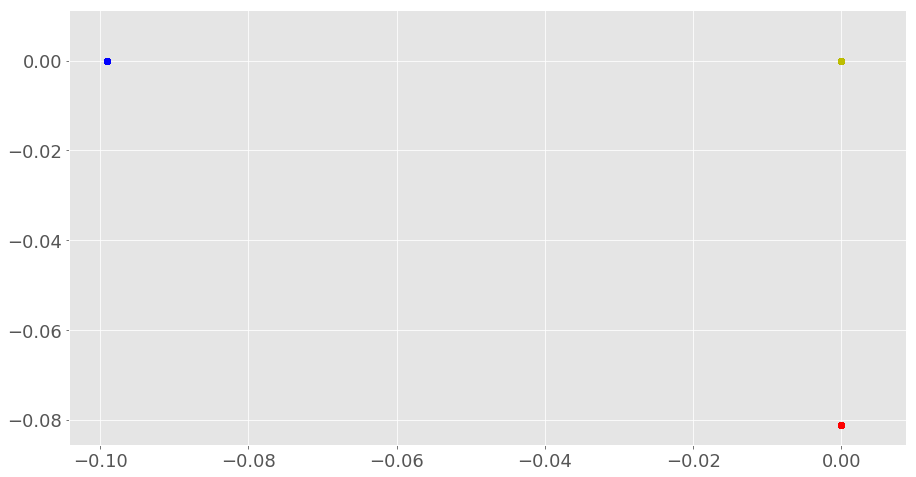

In [208]:
plot_2d(vec,data[:,3]);

## ILE

In [209]:
data = np.loadtxt('3Ddata.txt')

In [210]:
import scipy
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg

data = np.loadtxt('3Ddata.txt')
x = data[:, 0:3]

#! /usr/bin/env python
# -*- coding: utf-8 -*-


def distance_matrix(data):
    '''
    tested
    '''
    distances = np.zeros([data.shape[0], data.shape[0]])
    for (i, pointi) in enumerate(data):
        for (j, pointj) in enumerate(data):
            distances[i, j] = np.linalg.norm(pointi - pointj)
    return distances


def lle(data, dim=2, k=10):
    # compute L2 distance
    dist = distance_matrix(data)

    rn = range(dist.shape[0])
    dist[rn, rn] = np.inf

    neigh = dist.argsort(1)

    # STEP2: Solve for Reconstruction Weights
    # using a linear system is faster than inverting the matrix
    tol = 1e-3

    W = np.zeros((data.shape[0], k))
    for i in range(W.shape[0]):
        z = data[neigh[i, :k], :] - data[i]
        C = np.dot(z, z.T)
        # C_inv  = np.linalg.inv(C)
        # print np.sum(C_inv,axis=1)/np.sum(C_inv)
        # just a bit of tolerance in case it is singular
        C = C + np.eye(k) * tol * np.trace(C)
        W[i, :] = scipy.linalg.solve(C, np.ones((k, 1))).T
        W[i, :] /= W[i, :].sum()


    # Compute Embedding from Eigenvects of Cost Matrix M = (1 - W).T (1 - W)

    M = np.eye(data.shape[0])
    for i in range(M.shape[0]):
        w = W[i, :]
        j = neigh[i, :k]
        M[i, j] = M[i, j] - w
        M[j, i] = M[j, i] - w
        for l in range(w.shape[0]):
            M[j[l], j] = M[j[l], j] + w[l] * w

    # Calculation of Embedding
    val, vec = scipy.linalg.eig(M)
    index = np.real(val).argsort()
    index = index[::-1]

    return vec[:, index[-(dim + 1):-1]] * np.sqrt(data.shape[0])

In [211]:
data_2d = lle(data)

0

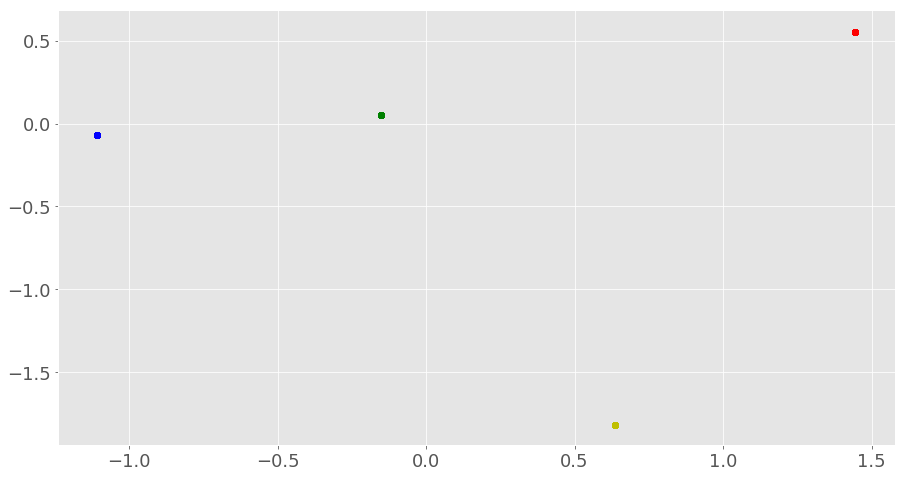

In [213]:
plot_2d(data_2d, data[:,3])

# VIOLA JONES FACE RECOGNITION

# Kernel Perceptron

In [214]:
x_ = np.loadtxt('train2k.databw.35')
y = np.loadtxt('train2k.label.35')

In [218]:
dim = x_.shape[1]
examples = x_.shape[0]

for i in np.arange(examples):
    x_[i] /= np.linalg.norm(x_[i])

# initialize w
x = np.ones((examples, dim + 1))
x[:, 1:] = x_

w = x[0]
errors = []
# eta = 0.2
# n = 100

# batch form
for n in range(1, 200):
    for i in range(1, examples):
        y_tilde = np.sign(np.dot(w, x[i]))
        if y_tilde * y[i] == 1:
            errors.append(0)
            continue
        else:
            # if n > 87 :
            #     plt.close()
            #     plt.figure()
            #     plt.matshow(x_[i].reshape((28, 28)), cmap='gray')
            #     plt.savefig('error_{}_{}_whiletrue_{}.pdf'.format(i, y_tilde, y[i]))
            #     plt.close()

            errors.append(1)
            w += y[i] * x[i]

test_ = np.loadtxt('test200.databw.35')
dim = test_.shape[1]
examples = test_.shape[0]

for i in np.arange(examples):
    test_[i] /= np.linalg.norm(test_[i])


# initialize w
test = np.ones((examples, dim + 1))
test[:, 1:] = test_

label = []

for test_num in range(0, examples):
    label.append(np.sign(np.dot(w, test[test_num])))

label = np.array(label, dtype=np.int)

In [219]:
label

array([-1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1])

# Gaussian Processes

Text(0.5,1,'Sample from prior')

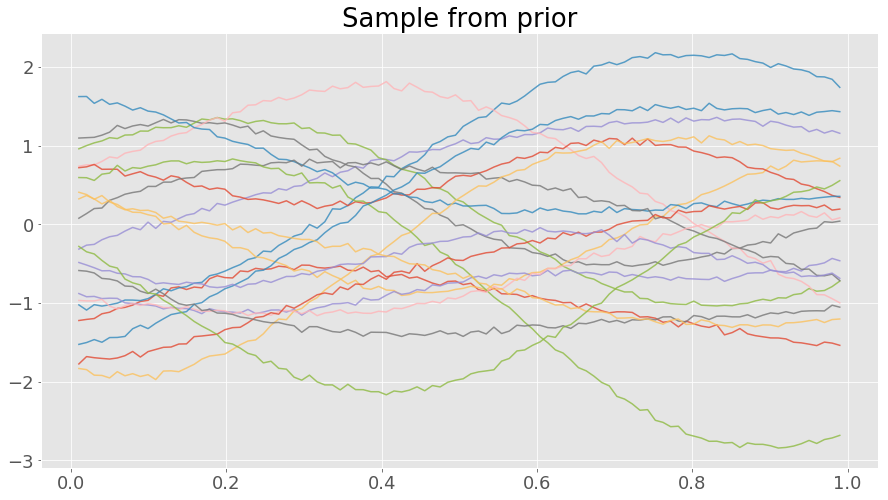

In [226]:
# KERNEL DEFINITION
def k_kernel(x, y):
    tau = 0.12
    return np.exp(-(x - y)**2 / (2. * tau))

# FIRST PART. DRAW FROM PRIOR


n_points = 100
z = np.linspace(0.01, 0.99, n_points)
K = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        K[i, j] = k_kernel(z[i], z[j])

K += np.identity(n_points) * 0.0006
plt.clf()
for i in np.arange(20):
    f_z = np.zeros(n_points)
    f_z[0] = np.random.normal()
    # i=1

    K_ = K[0, 0]
    kxx_ = K[1, 1]
    kx = K[1, 0]
    K_inv = 1. / K_
    mean = np.dot(kx.T, np.dot(K_inv, f_z[:1].T))
    sigma = kxx_ - np.dot(kx.T, np.dot(K_inv, kx))
    f_z[1] = np.random.normal(mean, np.sqrt(sigma))

    for i in np.arange(2, n_points):
        K_ = K[:i, :i]
        kxx_ = K[i, i]
        kx = K[i, :i]
        K_inv = np.linalg.inv(K_)
        # mean = np.dot(kx.T, np.dot(K_inv, f_z[:i].T))
        mean = np.dot(kx.T, np.linalg.solve(K_, f_z[:i]))
        # sigma = kxx_ - np.dot(kx.T, np.dot(K_inv, kx))
        sigma = kxx_ - np.dot(kx.T, np.linalg.solve(K_, kx))

        # print i, sigma
        f_z[i] = np.random.normal(mean, np.sqrt(sigma))

    plt.plot(z, f_z, alpha=0.8)

plt.title('Sample from prior')
# plt.savefig('sample_prior.pdf'.format(error_amp))


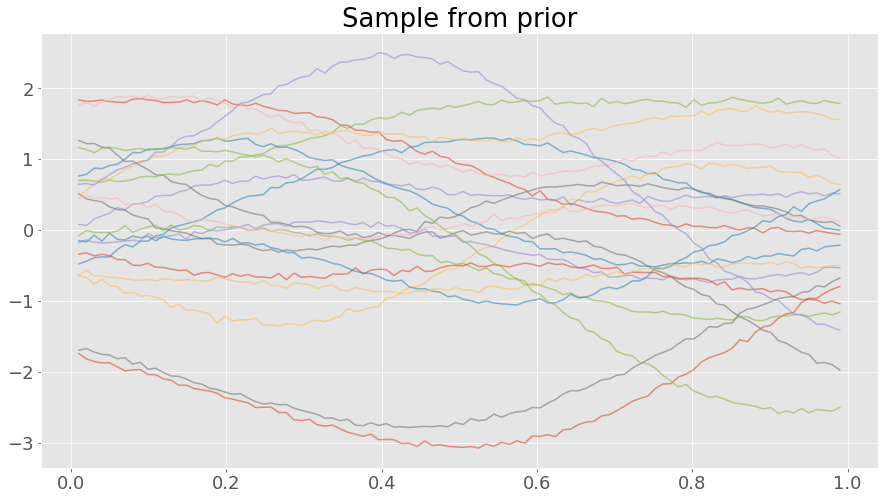

In [227]:

for i in np.arange(20):
    mu = np.zeros(n_points)
    plt.plot(z, np.random.multivariate_normal(mu, K), alpha=0.6)
plt.title('Sample from prior')
# plt.savefig('sample_prior_2.pdf'.format(error_amp))
plt.show()

plt.clf()

# ===============



Text(0.5,1,'$\\sigma = 1.0$')

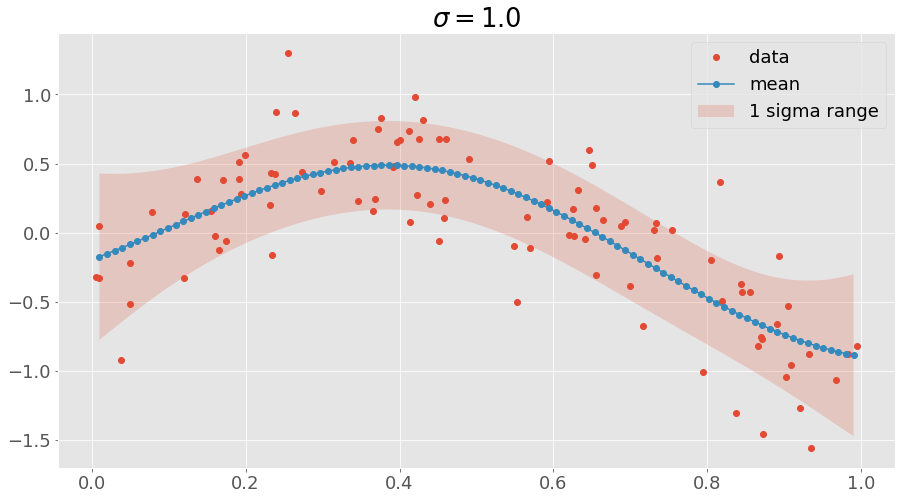

In [230]:
# SECOND PART. WORK WITH DATA

data = np.loadtxt('gp.dat')
ind = np.argsort(data[:, 0])
data_sort = data[ind]
data_sort[:, 1] -= np.mean(data_sort[:, 1])


n_points = data_sort.shape[0]
K = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        K[i, j] = k_kernel(data_sort[i, 0], data_sort[j, 0])

error_amp = 1.
K += np.identity(100) * error_amp
# K_inv = np.linalg.inv(K + np.identity(100) * 0.0001)
mu = np.linspace(0.01, 0.99, 100)
std = np.linspace(0.01, 0.99, 100)
z_mu = np.linspace(0.01, 0.99, 100)

for j, z in enumerate(z_mu):
#     print(j, z)
    kx = np.ones(n_points)

    for i in np.arange(n_points):
        kx[i] = k_kernel(z, data_sort[i, 0])
    # std[j] = np.sqrt(1. - np.dot(kx.T, np.dot(K_inv, kx)))
    # mu[j] = np.dot(kx.T, np.dot(K_inv, y))
    std[j] = 2. * np.sqrt(1. - np.dot(kx.T, np.linalg.solve(K, kx)))
    mu[j] = np.dot(kx.T, np.linalg.solve(K, data_sort[:, 1]))
plt.clf()
plt.fill_between(z_mu, mu - std, mu + std, alpha=0.2, label='1 sigma range')
plt.plot(data_sort[:, 0], data_sort[:, 1], 'o', label='data')
plt.plot(z_mu, mu, '-o', label='mean')
plt.legend(loc=0)
plt.title('$\sigma = {}$'.format(error_amp))
# plt.savefig('fig{}.pdf'.format(error_amp))
# ===============



Text(0.5,1,'$\\sigma = 0.1$, sample posterior')

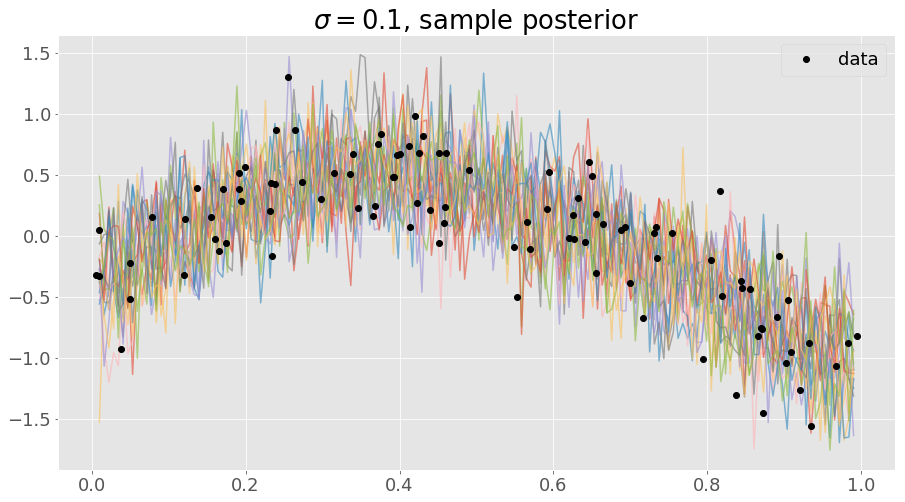

In [233]:
# Thid PART.Sample WITH DATA

n_points = 160
z = np.linspace(0.01, 0.99, n_points)

jointx = np.concatenate((data_sort[:, 0], z))


K = np.zeros((100 + n_points, 100 + n_points))
for i in range(n_points + 100):
    for j in range(n_points + 100):
        K[i, j] = k_kernel(jointx[i], jointx[j])


error_amp = 0.1
K += np.identity(100 + n_points) * error_amp
plt.clf()

for i in np.arange(20):
    f_z = np.zeros(n_points)

    for i in np.arange(100, 100 + n_points):
        K_ = K[:i, :i]
        kxx_ = K[i, i]
        kx = K[i, :i]
        # mean = np.dot(kx.T, np.dot(K_inv, f_z[:i].T))
        mean = np.dot(kx.T, np.linalg.solve(
            K_, np.concatenate((data_sort[:, 1], f_z[:i - 100]))))
        # sigma = kxx_ - np.dot(kx.T, np.dot(K_inv, kx))
        sigma = kxx_ - np.dot(kx.T, np.linalg.solve(K_, kx))
        # print i, sigma
        f_z[i - 100] = np.random.normal(mean, np.sqrt(sigma))

    plt.plot(z, f_z, alpha=0.6)


plt.plot(data_sort[:, 0], data_sort[:, 1], 'o', color='black',label='data')
# plt.plot(z_mu, mu, '-o', label='mean')
plt.legend(loc=0)
plt.title('$\sigma = {}$, sample posterior'.format(error_amp))